In [1]:
from BertFineTuning.question_answering_model_config import *
from BertFineTuning.loader import *
from BertFineTuning.loader_config import default_loader_config
from BertFineTuning.question_answering import *
from transformers.optimization import AdamW
import torch
%matplotlib inline

In [2]:
BFT=BertFineTuning()

In [3]:
BFT.criterion=nn.CrossEntropyLoss()
BFT.optimizer = AdamW(BFT.parameters_main)
BFT.scheduler=torch.optim.lr_scheduler.StepLR(BFT.optimizer, step_size=100)

In [4]:
dataloader_config={
'train-v1.1_bert_ready':default_loader_config,
'dev-v1.1_bert_ready':default_loader_config,
'train-v2.0_bert_ready':default_loader_config,
'dev-v2.0_bert_ready':default_loader_config
}

In [5]:
model_config

{'num_classes': 2,
 'dropout_prob': 0.5,
 'in_features': 768,
 'learning_rate_PT': 1e-09,
 'learning_rate_CLS': 1e-06,
 'weight_decay': 0.0001,
 'max_token_length': 150,
 'device': device(type='cuda', index=0)}

In [6]:
cwd = os.getcwd()
processed_data_folder=os.path.join(cwd,'data','processed')
ml=MultiLoader(processed_data_folder,dataloader_config,model_config,show_warning=False)

In [7]:
# model_config={'num_classes': 2,
#  'dropout_prob': 0.1,
#  'in_features': 768,
#  'learning_rate_PT': 1e-05,
#  'learning_rate_CLS': 1e-2,
#  'weight_decay': 0,
#  'max_token_length': 100,
#  'device': device}

In [8]:
# _loader_dict=next(iter(ml.dev_v1_1_bert_ready))
# ids,list_of_indices,segments_ids,labels=_loader_dict.values()
# start_labels,end_labels,span=labels
# output_start,output_end=BFT.model(list_of_indices,segments_ids)

In [9]:
# span=[list(range(*item)) for item in list(zip(start_labels,start_labels+1))] 
# for i,r in enumerate(span):
#     labels[i,r]=1
# labels=labels.flatten()

In [ ]:
BFT.train(ml.train_v1_1_bert_ready,ml.dev_v1_1_bert_ready,epochs=100,print_every=100,validate_at_epoch=0)

epoch:  1  step:  1 / 28
Batch Loss:  5.0186143
train results: 

{0.0: 'Poor', 1.0: 'Poor'}
MCC:  {0.0: 0.014665718506273717, 1.0: 0.014665718506273717}
Accuracy:  {0.0: 0.82598, 1.0: 0.82598}
{'F1 Macro ': 0.4845534838774635} {'F1 Micro': 0.82598}
{'F1 ': {0.0: 0.904061658109166, 1.0: 0.06504530964576095}}
Precision:  {0.0: 0.9676858437716371, 1.0: 0.03964373035277681}
recall:  {0.0: 0.8482877539055764, 1.0: 0.1810568295114656}
Predict      0.0          1.0          
Actual
0.0          122989       21996        

1.0          4107         908          


epoch:  1  step:  2 / 28
Batch Loss:  5.004489
train results: 

{0.0: 'Poor', 1.0: 'Poor'}
MCC:  {0.0: 0.01957563409252924, 1.0: 0.01957563409252924}
Accuracy:  {0.0: 0.80278, 1.0: 0.80278}
{'F1 Macro ': 0.47949105827554456} {'F1 Micro': 0.80278}
{'F1 ': {0.0: 0.8897041552485879, 1.0: 0.06927796130250118}}
Precision:  {0.0: 0.9680497184675548, 1.0: 0.04116503402377926}
recall:  {0.0: 0.8230903484385456, 1.0: 0.21849573328041277}
Pred

epoch:  1  step:  15 / 28
Batch Loss:  4.9539104
train results: 

{0.0: 'Poor', 1.0: 'Poor'}
MCC:  {0.0: 0.055042138006761866, 1.0: 0.055042138006761866}
Accuracy:  {0.0: 0.8583666666666666, 1.0: 0.8583666666666666}
{'F1 Macro ': 0.5088150099050229} {'F1 Micro': 0.8583666666666666}
{'F1 ': {0.0: 0.9231753929825449, 1.0: 0.09445462682750096}}
Precision:  {0.0: 0.9700725766614736, 1.0: 0.060168341026337224}
recall:  {0.0: 0.8806035018005712, 1.0: 0.2195798652397939}
Predict      0.0          1.0          
Actual
0.0          127647       17307        

1.0          3938         1108         


epoch:  1  step:  16 / 28
Batch Loss:  4.945369
train results: 

{0.0: 'Poor', 1.0: 'Poor'}
MCC:  {0.0: 0.0532068442872096, 1.0: 0.0532068442872096}
Accuracy:  {0.0: 0.86132, 1.0: 0.86132}
{'F1 Macro ': 0.5096473192992698} {'F1 Micro': 0.86132}
{'F1 ': {0.0: 0.9249106594953616, 1.0: 0.09438397910317806}}
Precision:  {0.0: 0.9691142764207963, 1.0: 0.06088861427849239}
recall:  {0.0: 0.88456360083682

test loss:  4.8825978303488835
{0.0: 'Poor', 1.0: 'Poor'}
MCC:  {0.0: 0.03502865084319243, 1.0: 0.03502865084319243}
Accuracy:  {0.0: 0.8581711103972588, 1.0: 0.8581711103972588}
{'F1 Macro ': 0.5032450247623932} {'F1 Micro': 0.8581711103972588}
{'F1 ': {0.0: 0.9231394149139268, 1.0: 0.08335063461085966}}
Precision:  {0.0: 0.9657892180670228, 1.0: 0.05459655485040798}
recall:  {0.0: 0.8840971788436616, 1.0: 0.17609216913269782}
Predict      0.0          1.0          
Actual
0.0          397712       52139        

1.0          14088        3011         


************************ 

epoch:  2  step:  1 / 28
Batch Loss:  4.887788
train results: 

{0.0: 'Poor', 1.0: 'Poor'}
MCC:  {0.0: 0.05269259969124586, 1.0: 0.05269259969124586}
Accuracy:  {0.0: 0.8597384370015949, 1.0: 0.8597384370015949}
{'F1 Macro ': 0.5082664845065931} {'F1 Micro': 0.8597384370015949}
{'F1 ': {0.0: 0.9239954091650765, 1.0: 0.09253755984810963}}
Precision:  {0.0: 0.9699949919072124, 1.0: 0.059083961418858376}
recall

epoch:  2  step:  15 / 28
Batch Loss:  4.837499
train results: 

{0.0: 'Poor', 1.0: 'Poor'}
MCC:  {0.0: 0.061057435021814765, 1.0: 0.061057435021814765}
Accuracy:  {0.0: 0.8643333333333333, 1.0: 0.8643333333333333}
{'F1 Macro ': 0.5124647218993617} {'F1 Micro': 0.8643333333333333}
{'F1 ': {0.0: 0.9266486922921653, 1.0: 0.09828075150655796}}
Precision:  {0.0: 0.9709341410540151, 1.0: 0.0629720061325308}
recall:  {0.0: 0.8862268430741228, 1.0: 0.22372402662900948}
Predict      0.0          1.0          
Actual
0.0          128541       16502        

1.0          3848         1109         


epoch:  2  step:  16 / 28
Batch Loss:  4.8511105
train results: 

{0.0: 'Poor', 1.0: 'Poor'}
MCC:  {0.0: 0.05017980487351823, 1.0: 0.05017980487351823}
Accuracy:  {0.0: 0.8500933333333334, 1.0: 0.8500933333333334}
{'F1 Macro ': 0.5048180360919645} {'F1 Micro': 0.8500933333333334}
{'F1 ': {0.0: 0.9183081808075451, 1.0: 0.09132789137638406}}
Precision:  {0.0: 0.969440353460972, 1.0: 0.05755908720456398

epoch:  2 Train  Loss:  4.855398 

************************
validation started ... 

test loss:  4.82393191035944
{0.0: 'Poor', 1.0: 'Poor'}
MCC:  {0.0: 0.03361250572959213, 1.0: 0.03361250572959213}
Accuracy:  {0.0: 0.8502966056322947, 1.0: 0.8502966056322947}
{'F1 Macro ': 0.500513709523223} {'F1 Micro': 0.8502966056322947}
{'F1 ': {0.0: 0.9184990696134349, 1.0: 0.08252834943301134}}
Precision:  {0.0: 0.9657845764569445, 1.0: 0.05320427123347943}
recall:  {0.0: 0.8756277078410407, 1.0: 0.18387040177788175}
Predict      0.0          1.0          
Actual
0.0          393902       55949        

1.0          13955        3144         


************************ 

epoch:  3  step:  1 / 28
Batch Loss:  4.8161225
train results: 

{0.0: 'Poor', 1.0: 'Poor'}
MCC:  {0.0: 0.05500547977569593, 1.0: 0.05500547977569593}
Accuracy:  {0.0: 0.8616459330143541, 1.0: 0.8616459330143541}
{'F1 Macro ': 0.5095881491143472} {'F1 Micro': 0.8616459330143541}
{'F1 ': {0.0: 0.9251038641253484, 1.0: 0.09407243

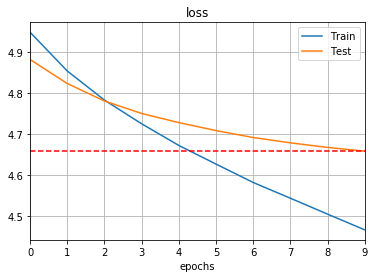

In [11]:
df_loss=pd.DataFrame([[np.mean(item) for item in chunks(BFT.loss_history,
                                                       math.ceil(len(BFT.loss_history)/len(BFT.test_loss_history))
                                                       )],BFT.test_loss_history]).T
df_loss.index.name='epochs'
df_loss.columns=['Train','Test']
ax=df_loss.plot(title='loss',grid=True)
# ax.axvline(2, color="red", linestyle="--")
ax.axhline(np.min(BFT.test_loss_history), color="red", linestyle="--")

In [ ]:
BFT.load_checkpoint(BFT.save_folder+'\checkpoint7.pth')

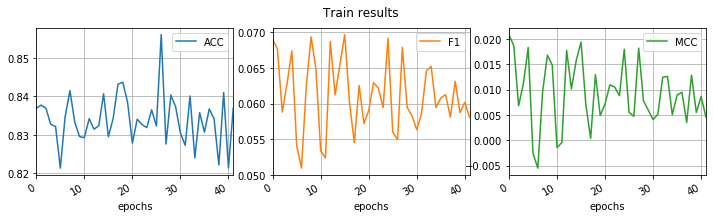

In [12]:
df=pd.DataFrame.from_dict([[item.ACC[1],item.F1[1],item.MCC[1]] for i,item in enumerate(BFT.cm_train)])
df.columns=['ACC','F1','MCC']
df.index.name='epochs'
df.plot(subplots=True,figsize=(12,3),layout=(1,3),title='Train results',grid=True);

C:\Users\rouzb\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
C:\Users\rouzb\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
C:\Users\rouzb\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


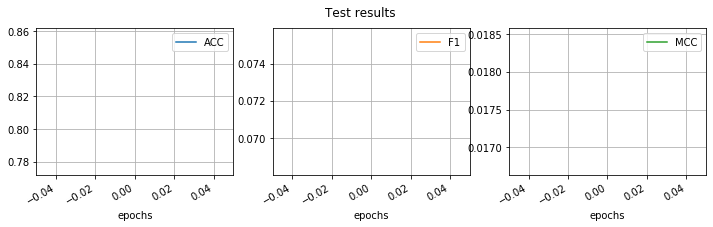

In [13]:
df=pd.DataFrame.from_dict([[item.ACC[1],item.F1[1],item.MCC[1]] for i,item in enumerate(BFT.cm_test)])
df.columns=['ACC','F1','MCC']
df.index.name='epochs'
df.plot(subplots=True,figsize=(12,3),layout=(1,3),title='Test results',grid=True);

In [5]:
from transformers import BertTokenizer, BertForQuestionAnswering,DistilBertForQuestionAnswering, BertConfig

In [10]:
x=BertForQuestionAnswering.from_pretrained('bert-base-uncased')

In [7]:
import pandas as pd
%matplotlib inline

In [8]:
df=pd.read_csv('./data/processed/dev_v1_1_1.csv')

In [14]:
df.head()

,Unnamed: 0,qa_id,start_label,end_label,text,total_tokens
0,0,5733be284776f41900661182,130,138,[CLS] To whom did the Virgin Mary allegedly ap...,192
1,1,5733be284776f4190066117f,52,57,[CLS] What is in front of the Notre Dame Main ...,184
2,2,5733be284776f41900661180,28,31,[CLS] The Basilica of the Sacred heart at Notr...,192
3,3,5733be284776f41900661181,95,102,[CLS] What is the Grotto at Notre Dame? [SEP] ...,180
4,4,5733be284776f4190066117e,33,40,[CLS] What sits on top of the Main Building at...,186


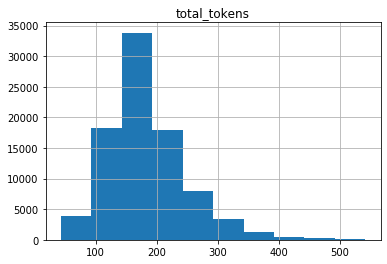

In [15]:
df.hist('total_tokens');

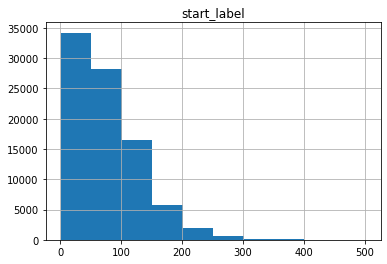

In [12]:
df.hist('start_label');

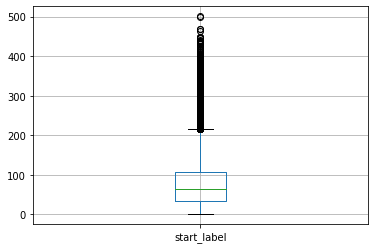

In [13]:
df.boxplot('start_label');

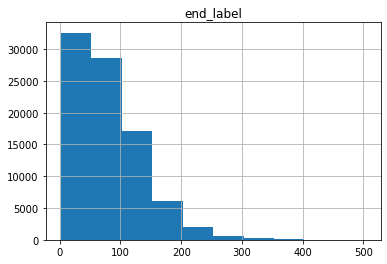

In [11]:
df.hist('end_label');

In [16]:
df[df.isna()].shape

(87598, 10)

In [17]:
new_df=df[~df.isna()]

In [18]:
new_df.to_csv('./data/processed/dev_v1_1_2.csv')